In [1]:
import pandas as pd
from collections import Counter

import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)

from citations import citations_dict

In [2]:
data = pd.read_csv('data.csv')
del data['Unnamed: 0']

Text(0, 0.5, 'Publications')

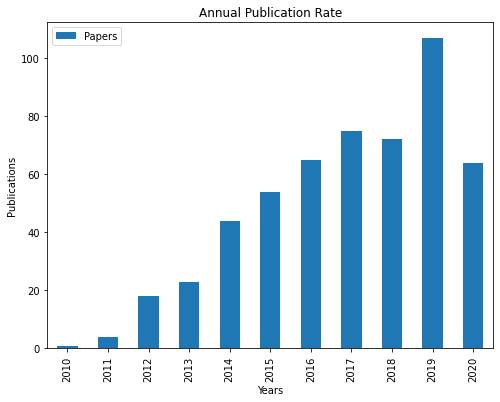

In [3]:
# Annual Publication Rate

years_unique = list(range(2010, 2021))

annual_pub_rate = pd.DataFrame()
annual_pub_rate['Years'] = years_unique
annual_pub_rate['Papers'] = 0

for index in range(len(data)):
    
    year = int(data.iloc[index, 3])

    if year != 2021:
        year_index = years_unique.index(year)
        year_val = annual_pub_rate.iloc[year_index, 1]
        annual_pub_rate.iloc[year_index, 1] = year_val + 1
    else:
        pass

annual_pub_rate.plot.bar(x = 'Years', y = 'Papers')
plt.title('Annual Publication Rate')
plt.ylabel('Publications')

Text(0, 0.5, 'Citations')

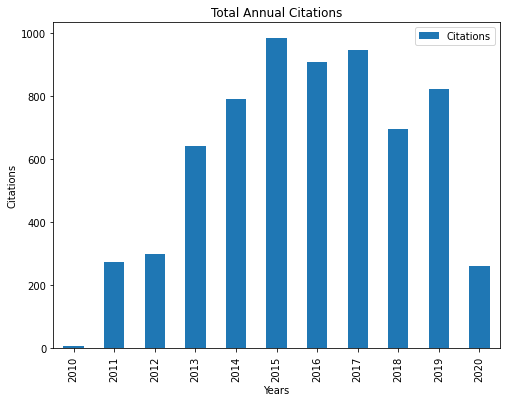

In [4]:
# Total Annual Citations 

annual_cit = pd.DataFrame()
annual_cit['Years'] = list(range(2010, 2021))
annual_cit['Citations'] = 0

for index in range(len(data)):
    
    year = int(data.iloc[index, 3])

    if year != 2021:
        year_index = years_unique.index(year)
        year_citations = int(annual_cit.iloc[year_index, 1])
        article_citations = int(data.iloc[index, 11])
        annual_cit.iloc[year_index, 1] = year_citations + article_citations
    else:
        pass

annual_cit.plot.bar(x = 'Years', y = 'Citations')
plt.title('Total Annual Citations')
plt.ylabel('Citations')

In [5]:
# Most cited articles globally according to citation count

citations = data.sort_values(by = ['Cited by'], ascending = False).head(10)

for index in range(len(citations)):
    print('[{}] - {}, {}'.format(citations.iloc[index, 11], citations.iloc[index, 2], citations.iloc[index, 0]))

[209.0] - Advanced Persistent threats and how to monitor and deter them, Tankard C.
[202.0] - Advanced social engineering attacks, Krombholz K., Hobel H., Huber M., Weippl E.
[141.0] - A study on advanced persistent threats, Chen P., Desmet L., Huygens C.
[140.0] - FlipIt: The game of "stealthy takeover", Van Dijk M., Juels A., Oprea A., Rivest R.L.
[113.0] - Targeted cyberattacks: A superset of advanced persistent threats, Sood A.K., Enbody R.J.
[112.0] - The big four - What we did wrong in advanced persistent threat detection?, Virvilis N., Gritzalis D.
[110.0] - Combating advanced persistent threats: From network event correlation to incident detection, Friedberg I., Skopik F., Settanni G., Fiedler R.
[94.0] - A Hierarchical Security Framework for Defending Against Sophisticated Attacks on Wireless Sensor Networks in Smart Cities, Wu J., Ota K., Dong M., Li C.
[88.0] - Detecting APT malware infections based on malicious DNS and traffic analysis, Zhao G., Xu K., Xu L., Wu B.
[79.0] -

In [6]:
# Authors with the most documents

authors_dict = {}

for index in range(len(data)):
    authors = data.iloc[index, 1].split(';')[:-1]
    
    for author in authors:
        if author in authors_dict.keys():
            val = authors_dict[author]
            authors_dict[author] = val + 1
        else:
            authors_dict[author] = 1
            
for author in sorted(authors_dict, key = authors_dict.get, reverse = True)[:10]:
    print('Author_ID - {}, value - {}'.format(author, authors_dict[author]))

Author_ID - 24767254400, value - 12
Author_ID - 51462321100, value - 8
Author_ID - 27568141600, value - 7
Author_ID - 55834308200, value - 7
Author_ID - 35338414300, value - 7
Author_ID - 56784374200, value - 7
Author_ID - 7006046302, value - 7
Author_ID - 36675926500, value - 7
Author_ID - 55477678600, value - 7
Author_ID - 6602317815, value - 7


In [7]:
# Authors with the most citations

authors_dict1 = {}

for index in range(len(data)):
    authors = data.iloc[index, 1].split(';')[:-1]
    
    for author in authors:
        if author in authors_dict1.keys():
            val = authors_dict1[author]
            authors_dict1[author] = val + int(data.iloc[index, 11])
        else:
            authors_dict1[author] = int(data.iloc[index, 11])
            
for author in sorted(authors_dict1, key = authors_dict1.get, reverse = True)[:10]:
    print('ID - {}, value - {}'.format(author, authors_dict1[author]))

ID - 24767254400, value - 280
ID - 57206038548, value - 253
ID - 55627877945, value - 225
ID - 56021667300, value - 223
ID - 56021669300, value - 223
ID - 8925433900, value - 223
ID - 26647949100, value - 210
ID - 36609263200, value - 199
ID - 7102854233, value - 175
ID - 57204380100, value - 175


In [8]:
# Publication Fora

for item in Counter(data['Source title'].tolist()).most_common(15):
    print('{} ; count = {}'.format(item[0], item[1]))

Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics) ; count = 50
IEEE Access ; count = 21
Computers and Security ; count = 13
Communications in Computer and Information Science ; count = 13
ACM International Conference Proceeding Series ; count = 12
Future Generation Computer Systems ; count = 10
Proceedings of the ACM Conference on Computer and Communications Security ; count = 10
IEEE Transactions on Information Forensics and Security ; count = 7
Advances in Intelligent Systems and Computing ; count = 7
IEEE Security and Privacy ; count = 6
Security and Communication Networks ; count = 6
Network Security ; count = 5
Proceedings - IEEE Military Communications Conference MILCOM ; count = 5
Procedia Computer Science ; count = 5
Journal of Supercomputing ; count = 5


([<matplotlib.patches.Wedge at 0x1a61d0e5190>,
 [Text(1.0568700573181382, 0.30500111793951784, 'Computer Crime 1 (Network Security)'),
  Text(0.909314615851365, 0.618988634305255, 'Artificial Intelligence in Error Detection'),
  Text(-0.5837051526519761, 0.9323563132019503, 'Network Security 1  (Computer Crime and Malware)'),
  Text(-0.8117955444125209, -0.7422856553052734, 'Big Data'),
  Text(-0.11498137958500317, -1.0939740775487916, 'Game Theory'),
  Text(0.5304213334771202, -0.9636665445019631, 'Network Security 2  (Internet Protocol and Cyber Threats)'),
  Text(0.7106469843286528, -0.8396313855880994, 'Malware in financial organisations'),
  Text(1.0116382030692168, -0.43195850042670314, 'Computer Crime 2  (Malware)')],
 [Text(0.5764745767189844, 0.16636424614882792, '8.9%'),
  Text(0.49598979046438085, 0.3376301641665027, '1.1%'),
  Text(-0.31838462871925965, 0.5085579890192456, '47.6%'),
  Text(-0.4427975696795568, -0.4048830847119672, '8.1%'),
  Text(-0.06271711613727445, -0.59

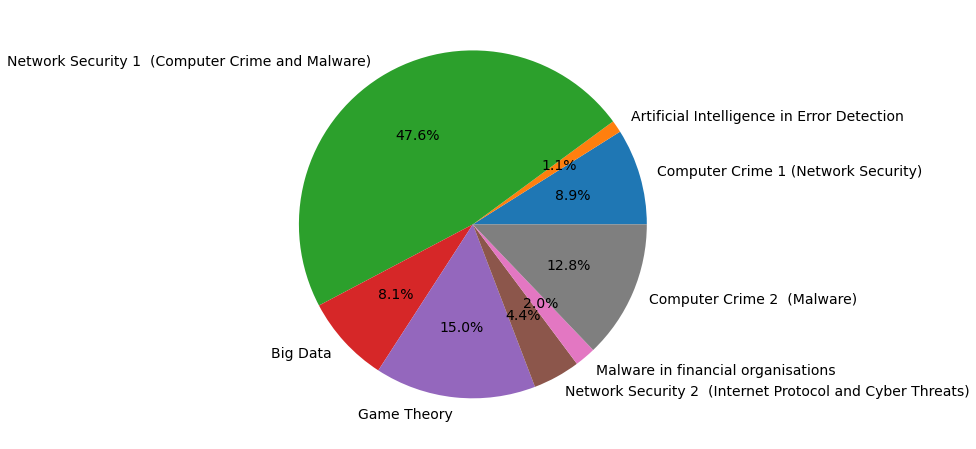

In [9]:
# Authors community %

plt.figure(figsize = (8, 8))

plt.pie([55, 7, 293, 50, 92, 27, 12, 79], labels = 
        ["Computer Crime 1 (Network Security)", 
        "Artificial Intelligence in Error Detection",
        "Network Security 1  (Computer Crime and Malware)", "Big Data", "Game Theory",
        "Network Security 2  (Internet Protocol and Cyber Threats)",
        "Malware in financial organisations", "Computer Crime 2  (Malware)"], autopct = '%1.1f%%', textprops={'fontsize': 14})

([<matplotlib.patches.Wedge at 0x1a61d153190>,
 [Text(1.0155246232214754, 0.4227407475402395, 'Computer Crime 1 (Network Security)'),
  Text(0.7640003437453178, 0.7913933754821532, 'Artificial Intelligence in Error Detection'),
  Text(-0.6944580174895961, 0.8530697872650396, 'Network Security 1  (Computer Crime and Malware)'),
  Text(-0.8280872561478482, -0.724065947414687, 'Big Data'),
  Text(-0.10058749653311069, -1.0953913252994116, 'Game Theory'),
  Text(0.6199568878983036, -0.908654751348085, 'Network Security 2  (Internet Protocol and Cyber Threats)'),
  Text(0.7527758598572929, -0.8020776177005026, 'Malware in financial organisations'),
  Text(1.0213791683405569, -0.4083926964086804, 'Computer Crime 2  (Malware)')],
 [Text(0.5539225217571684, 0.23058586229467606, '12.6%'),
  Text(0.4167274602247188, 0.4316691138993562, '0.4%'),
  Text(-0.3787952822670524, 0.4653107930536579, '45.7%'),
  Text(-0.4516839578988262, -0.3949450622261929, '5.4%'),
  Text(-0.05486590719987856, -0.59748

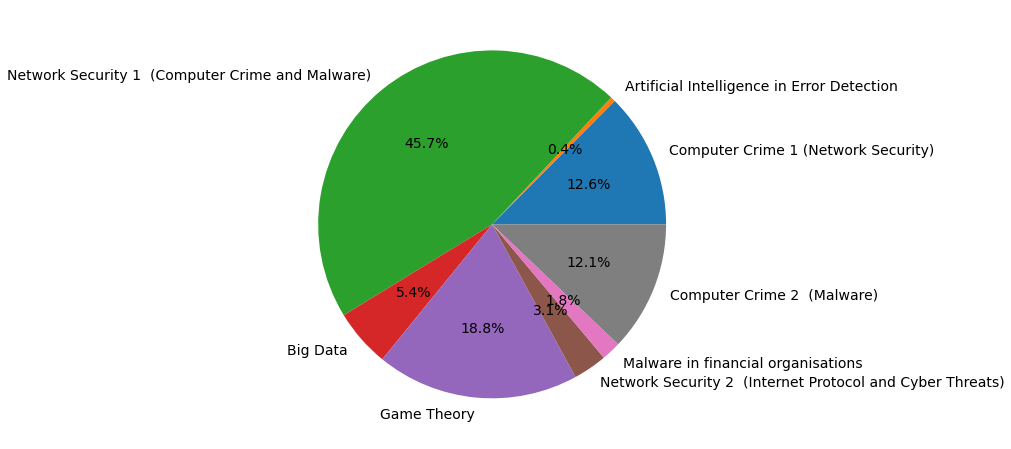

In [10]:
# Paper Community %

plt.figure(figsize = (8, 8))

plt.pie([28, 1, 102, 12, 42, 7, 4, 27], labels = 
        ["Computer Crime 1 (Network Security)", 
        "Artificial Intelligence in Error Detection",
        "Network Security 1  (Computer Crime and Malware)", "Big Data", "Game Theory",
        "Network Security 2  (Internet Protocol and Cyber Threats)",
        "Malware in financial organisations", "Computer Crime 2  (Malware)"], autopct = '%1.1f%%', textprops={'fontsize': 14})

In [11]:
author_df = pd.read_csv('author.csv')
del author_df['Unnamed: 0']

merge_dict = {2 : 8, 3 : 6, 4 : 0, 5 : 11, 7 : 14, 10 : 6, 12 : 6, 15 : 14, 16 : 8}

for key, value in merge_dict.items():
    author_df.loc[author_df[author_df['Partition'] == key].index.tolist(), 'Partition'] = value

order_values_dict = {6 : 2, 8 : 3, 9 : 4, 11 : 5, 13 : 6, 14 : 7}

for key, value in order_values_dict.items():
    author_df.loc[author_df[author_df['Partition'] == key].index.tolist(), 'Partition'] = value
        
author_df_auth = author_df['Author_ID'].tolist()
len(author_df_auth)

615

In [12]:
data = data.filter(['Authors', 'Author(s) ID', 'Title', 'Year', 'Cited by', 'DOI', 'Author Keywords', 'Index Keywords', 'Conference name'])

data['Auth_ID'] = None
data['Auth_Keywords'] = None
data['Ind_Keywords'] = None

for index in range(len(data)):

    try:
        data.at[index, 'Auth_ID'] = data.iloc[index, 1].split(';')[:-1]
    except:
        pass
    try:
        data.at[index, 'Auth_Keywords'] = data.iloc[index, 6].split('; ')
    except:
        pass
    try:
        data.at[index, 'Ind_Keywords'] = data.iloc[index, 7].split('; ')
    except:
        pass

data = data.filter(['Authors', 'Auth_ID', 'Title', 'Year', 'Cited by', 'DOI', 'Auth_Keywords', 'Ind_Keywords', 'Conference name'])

data_copy = data.copy()
existing_DOIs = data['DOI'].tolist()
data['Citations'] = None
data['Cit_Updated'] = None

for index in range(len(data)):
    doi = data.iloc[index, 5]
    try:
        data.at[index, 'Citations'] = citations_dict[doi]
    except:
        pass
    
for index in range(len(data)):
    citations = data.iloc[index, 9]
    fin_citations = []
    try:
        for citation in citations:
            if citation in existing_DOIs:
                fin_citations.append(citation)
        if len(fin_citations) > 0:
            data.at[index, 'Cit_Updated'] = fin_citations
    except:
        pass

data = data.dropna(subset = ['Cit_Updated'])
data = data.reset_index()
data = data.filter(['Authors', 'Auth_ID', 'Title', 'Cited by', 'DOI', 'Auth_Keywords', 'Ind_Keywords', 'Cit_Updated'])

data['Cit_Authors'] = None

for index in range(len(data)):
    citations = data.iloc[index, 7]
    cit_authors = []
    cit_authors_final = []
    
    for citation in citations:
        row = data_copy.loc[data_copy['DOI'] == citation]

        for author in row.iloc[0, 1]:
            cit_authors.append(author)
            
    [cit_authors_final.append(x) for x in cit_authors if x not in cit_authors_final]
    data.at[index, 'Cit_Authors'] = cit_authors_final
    
len(data)

248

In [13]:
for index in range(len(data)):
    
    authors = data.iloc[index, 1]
    authors = [int(x) for x in authors]
    cit_authors = data.iloc[index, 8]
    cit_authors = [int(x) for x in cit_authors]
    authors_final = []
    cit_authors_final = []
    
    for author in authors:
        if author in author_df_auth:
            authors_final.append(author)
    for author in cit_authors:
        if author in author_df_auth:
            cit_authors_final.append(author)
            
    author_comm = []
    cit_author_comm = []
    
    for author in authors_final:
        author_comm.append(author_df[author_df['Author_ID'] == author].iloc[0]['Partition'])
    for author in cit_authors_final:
        cit_author_comm.append(author_df[author_df['Author_ID'] == author].iloc[0]['Partition'])
        
    author_comm_final = (list(set(author_comm)))
    cit_author_comm_final = (list(set(cit_author_comm)))
    
    for comm in author_comm_final:
        if len(cit_author_comm_final) > 0:
            if comm not in cit_author_comm_final:
                print('index {}, comm - {}, connections - {}'.format(index, comm, cit_author_comm_final))
                
    for comm in cit_author_comm_final:
        if len(author_comm_final) > 0:
            if comm not in author_comm_final:
                print('index {}, comm - {}, connections - {}'.format(index, comm, author_comm_final))

index 0, comm - 4, connections - [2]
index 1, comm - 2, connections - [7]
index 1, comm - 4, connections - [7]
index 1, comm - 7, connections - [2, 4]
index 4, comm - 7, connections - [2]
index 5, comm - 0, connections - [2]
index 5, comm - 4, connections - [2]
index 5, comm - 6, connections - [2]
index 10, comm - 2, connections - [7]
index 11, comm - 5, connections - [4]
index 16, comm - 0, connections - [2]
index 17, comm - 2, connections - [7]
index 18, comm - 2, connections - [0]
index 19, comm - 0, connections - [4]
index 19, comm - 2, connections - [4]
index 19, comm - 6, connections - [4]
index 19, comm - 7, connections - [4]
index 23, comm - 7, connections - [2]
index 23, comm - 2, connections - [7]
index 25, comm - 3, connections - [7]
index 25, comm - 7, connections - [3]
index 26, comm - 7, connections - [2]
index 27, comm - 2, connections - [3]
index 27, comm - 3, connections - [2]
index 28, comm - 2, connections - [3]
index 32, comm - 2, connections - [7]
index 34, comm - 

{0: Text(0.19816873062796875, -0.3096767363749632, '0'),
 2: Text(-0.002700475498164747, -0.06287296025671235, '2'),
 3: Text(-0.3544379471192012, -0.33981459070939085, '3'),
 4: Text(-0.21331976823080498, 0.370128905915451, '4'),
 5: Text(1.0, -0.07542757333945212, '5'),
 6: Text(-0.7988525459928291, 0.2225480431418141, '6'),
 7: Text(0.17114200621303008, 0.19511491162325434, '7')}

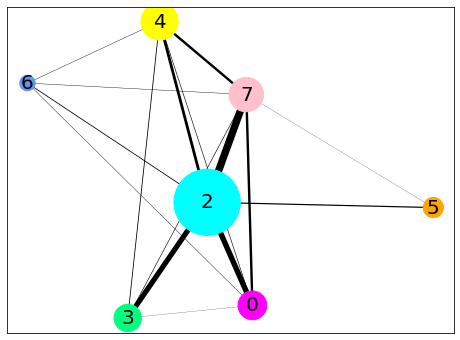

In [18]:
G = nx.Graph()

G.add_node(0)
# G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)
G.add_node(7)

G.add_edge(0, 2, weight = 27)
G.add_edge(0, 3, weight = 1)
G.add_edge(0, 4, weight = 3)
G.add_edge(0, 6, weight = 2)
G.add_edge(0, 7, weight = 12)

G.add_edge(2, 3, weight = 26)
G.add_edge(2, 4, weight = 14)
G.add_edge(2, 5, weight = 6)
G.add_edge(2, 6, weight = 4)
G.add_edge(2, 7, weight = 37)

G.add_edge(3, 4, weight = 4)
G.add_edge(3, 7, weight = 3)

G.add_edge(4, 6, weight = 2)
G.add_edge(4, 7, weight = 12)

G.add_edge(5, 7, weight = 1)

G.add_edge(6, 7, weight = 2)

pos = nx.spring_layout(G)
node_degree = [55, 293, 50, 92, 27, 16, 79]
edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]

colors = ['magenta', 'cyan', 'springgreen', 'yellow', 'orange', 'cornflowerblue', 'pink']

nx.draw_networkx_nodes(G, pos, node_size = [x * 15 for x in node_degree], node_color = colors)
nx.draw_networkx_edges(G, pos, width = [x * 0.2 for x in weights])
nx.draw_networkx_labels(G, pos, font_size = 20, font_family = "sans-serif")